In [105]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# New Section

In [106]:
# Create dataframe from .csv file
bankdata_df = pd.read_csv("/content/sample_data/Bank_Personal_Loan_Modelling.csv")
bankdata_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# information about dataframe attributes
bankdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
#getting the size of the dataframe
bankdata_df.shape

(5000, 14)

In [112]:
#Creating the copy of the bankdata_df
bankeval_df = bankdata_df.copy()

In [7]:
bankeval_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
# Finding the count of Null data in the dataframe
bankeval_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
# Getting the Unique number of records under each attributes
bankeval_df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [10]:
# Finding the total number of records as value under the Mortgage attributes
(bankeval_df['Mortgage']==0).sum()

3462

In [11]:
# Finding the total number of records as value under the CCAvg attributes
(bankeval_df['CCAvg']==0).sum()

106

In [12]:
# get the distribution of attribution of all the attributes in percent
for i in list(bankeval_df.columns):
  print(bankeval_df[i].value_counts(normalize=True)*100)
  print()

2047    0.02
2608    0.02
4647    0.02
2600    0.02
553     0.02
        ... 
3263    0.02
1218    0.02
3267    0.02
1222    0.02
2049    0.02
Name: ID, Length: 5000, dtype: float64

35    3.02
43    2.98
52    2.90
58    2.86
54    2.86
50    2.76
41    2.72
30    2.72
56    2.70
34    2.68
39    2.66
59    2.64
57    2.64
51    2.58
60    2.54
45    2.54
46    2.54
42    2.52
40    2.50
31    2.50
55    2.50
62    2.46
29    2.46
61    2.44
44    2.42
32    2.40
33    2.40
48    2.36
38    2.30
49    2.30
47    2.26
53    2.24
63    2.16
36    2.14
37    2.12
28    2.06
27    1.82
65    1.60
64    1.56
26    1.56
25    1.06
24    0.56
66    0.48
23    0.24
67    0.24
Name: Age, dtype: float64

 32    3.08
 20    2.96
 9     2.94
 5     2.92
 23    2.88
 35    2.86
 25    2.84
 28    2.76
 18    2.74
 19    2.70
 26    2.68
 24    2.62
 3     2.58
 14    2.54
 16    2.54
 30    2.52
 34    2.50
 27    2.50
 17    2.50
 29    2.48
 22    2.48
 7     2.42
 8     2.38
 6     2.38
 15    

In [15]:
for col in list(bankeval_df.columns[bankeval_df.dtypes=='object']):
    print(bankeval_df[col].value_counts(),'\n')

In [16]:

# Get the distribution of the Family and Education attributes in the dataset in percent
print(bankeval_df['Family'].value_counts(),'\n')
print(bankeval_df['Education'].value_counts(),'\n')

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64 

1    2096
3    1501
2    1403
Name: Education, dtype: int64 



In [113]:
#Getting the negative experience list 
posexp = bankeval_df.loc[bankeval_df['Experience'] >0]
minus = bankeval_df.Experience < 0
which_column = 'Experience'
neglist = bankeval_df.loc[minus]['ID'].tolist()
print("Total Number of Negative Experiences : ",len(neglist))
print("\n")
print("Negative List  :",neglist)

Total Number of Negative Experiences :  52


Negative List  : [90, 227, 316, 452, 525, 537, 541, 577, 584, 598, 650, 671, 687, 794, 890, 910, 1174, 1429, 1523, 1906, 2103, 2431, 2467, 2546, 2619, 2718, 2849, 2877, 2963, 2981, 3077, 3131, 3158, 3280, 3285, 3293, 3395, 3426, 3627, 3797, 3825, 3888, 3947, 4016, 4089, 4117, 4286, 4412, 4482, 4515, 4583, 4958]


In [116]:
# Here, replacing/imputing the negative experiences from the dataframe with median value of the experience column
#Converting Float64 to int64 in experience columns and filling any left over null values with 0
for id in neglist:
    age = bankeval_df.loc[np.where(bankeval_df['ID']==id)]["Age"].tolist()[0]
    education = bankeval_df.loc[np.where(bankeval_df['ID']==id)]["Education"].tolist()[0]
    df_noneg = posexp[(posexp.Age == age) & (posexp.Education == education)]
    exp = df_noneg['Experience'].median()
    bankeval_df.loc[bankeval_df.loc[np.where(bankeval_df['ID']==id)].index, 'Experience'] = exp
bankeval_df.describe()
bankeval_df = bankeval_df.fillna(0)
bankeval_df['Experience'].astype(np.int)

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

In [ ]:
# The below blocks of code is for univariate analysis of multiple columns with personal loan.

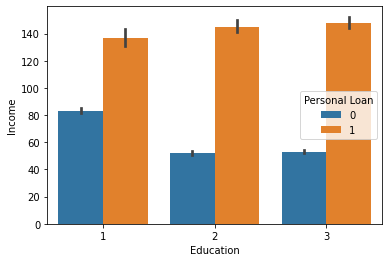

In [40]:
sns.barplot(x="Education", y="Income", hue="Personal Loan", data=bankeval_df)

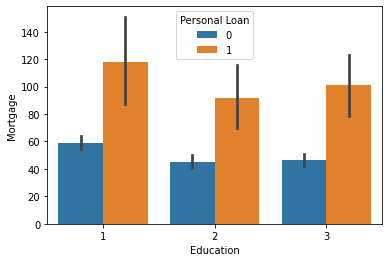

In [41]:
sns.barplot(x="Education", y="Mortgage", hue="Personal Loan", data=bankeval_df)

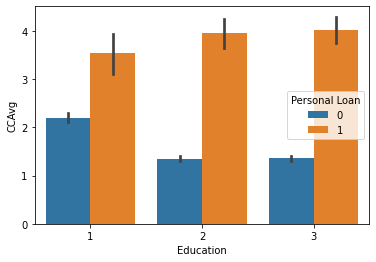

In [42]:
sns.barplot(x="Education", y="CCAvg", hue="Personal Loan", data=bankeval_df)

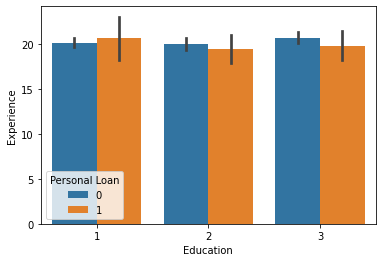

In [43]:
sns.barplot(x="Education", y="Experience", hue="Personal Loan", data=bankeval_df)

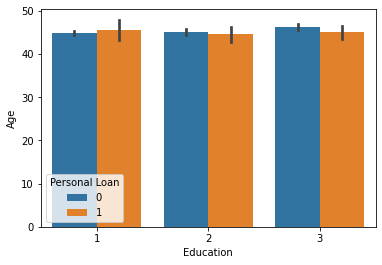

In [44]:
sns.barplot(x="Education", y="Age", hue="Personal Loan", data=bankeval_df)

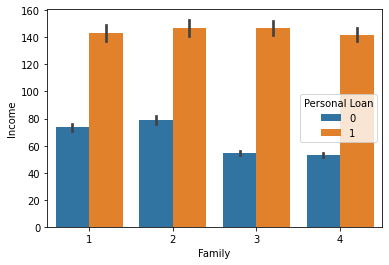

In [45]:
sns.barplot(x="Family", y="Income", hue="Personal Loan", data=bankeval_df)

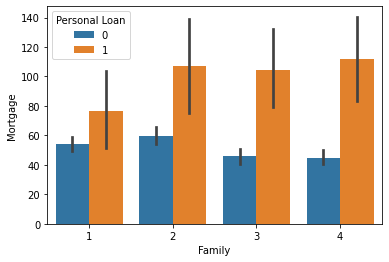

In [46]:
sns.barplot(x="Family", y="Mortgage", hue="Personal Loan", data=bankeval_df)

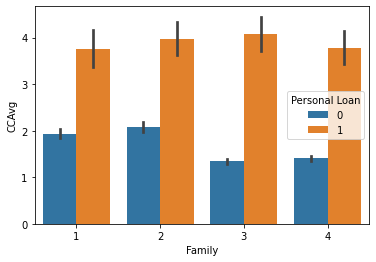

In [47]:
sns.barplot(x="Family", y="CCAvg", hue="Personal Loan", data=bankeval_df)

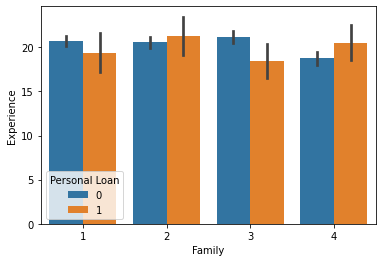

In [48]:
sns.barplot(x="Family", y="Experience", hue="Personal Loan", data=bankeval_df)

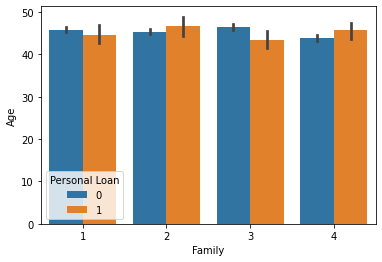

In [49]:
sns.barplot(x="Family", y="Age", hue="Personal Loan", data=bankeval_df)

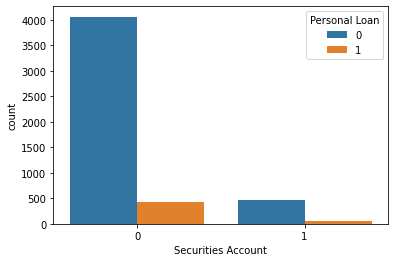

In [50]:
sns.countplot(x="Securities Account", data=bankeval_df,hue="Personal Loan")

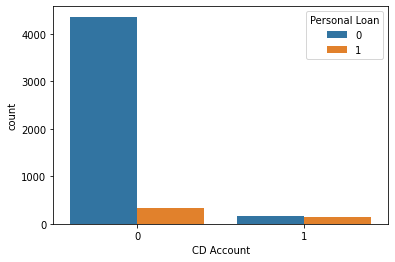

In [51]:
sns.countplot(x="CD Account", data=bankeval_df,hue="Personal Loan")

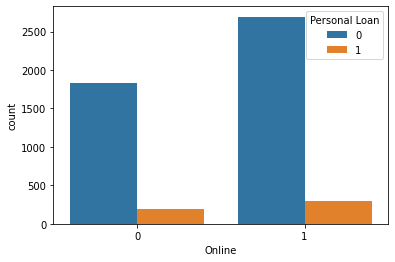

In [52]:
sns.countplot(x="Online", data=bankeval_df,hue="Personal Loan")

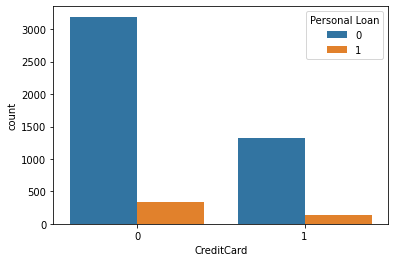

In [53]:
sns.countplot(x="CreditCard", data=bankeval_df,hue="Personal Loan")

Here, Bivariate Analysis and data training for the logistic regression model.

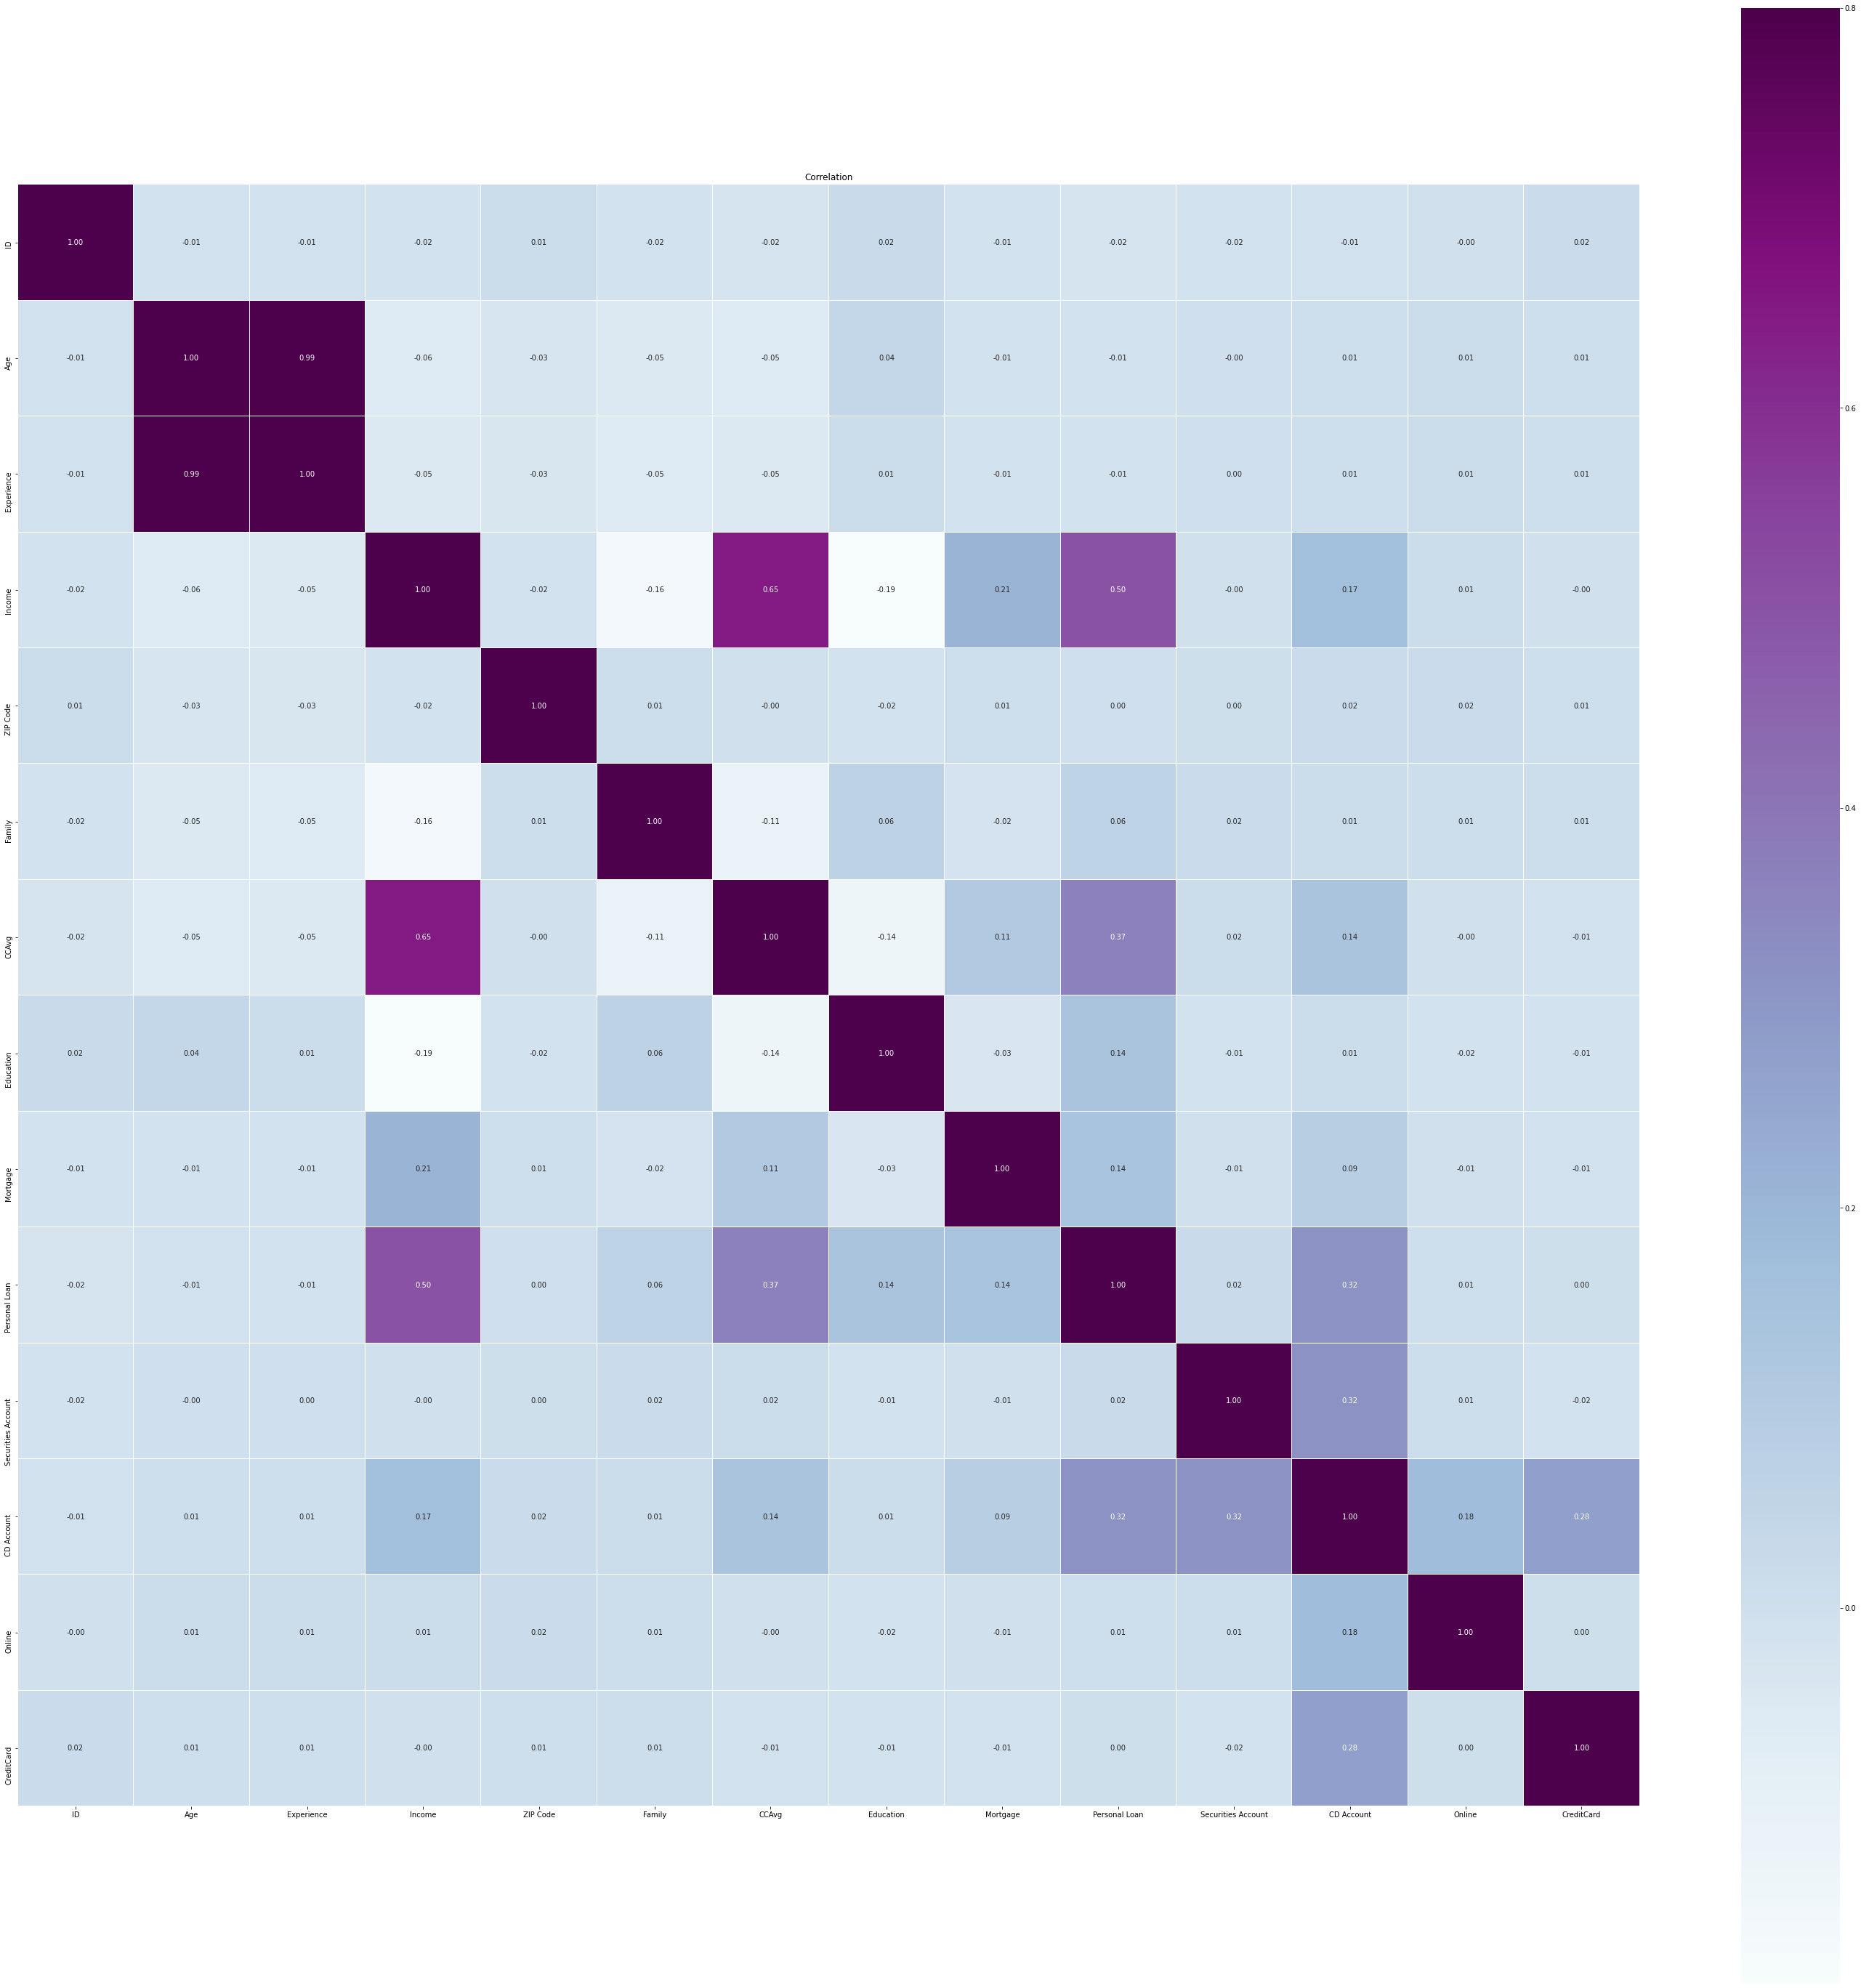

In [54]:
#Bivariate Analysis using heat map
plt.figure(figsize=(50, 50))
ax = sns.heatmap(bankeval_df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01,cmap="BuPu")
plt.title('Correlation')
plt.show()

##
Here, as per heatmap there is a high correlation between Experience and CCAvg towards Personal loan.
Hence we can drop either Experience or CCAvg. Here the column CCAvg has been dropped. 
Considering Experience,Income,Education,Family,mortgage
and etc is an as independant parameter in predicitng the dependant variable Personal loan

In [136]:
#Preparing Training and Testing Dataset by dropping necessary columns.
X = bankeval_df.drop(['Age','ID','CCAvg','ZIP Code','Personal Loan'], axis=1)
Y = bankeval_df['Personal Loan'].astype('category')

In [137]:
#Convert categorical variable into dummy/indicator variables.
X = pd.get_dummies(X, drop_first=True)
print(X.columns)

Index(['Experience', 'Income', 'Family', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [139]:
#Splitting data for training and testing in the ratio of 70:30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 717 to 4271
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Experience          3500 non-null   float64
 1   Income              3500 non-null   int64  
 2   Family              3500 non-null   int64  
 3   Education           3500 non-null   int64  
 4   Mortgage            3500 non-null   int64  
 5   Securities Account  3500 non-null   int64  
 6   CD Account          3500 non-null   int64  
 7   Online              3500 non-null   int64  
 8   CreditCard          3500 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 273.4 KB


In [140]:
#Here, fit the logistic regression model on training data
logreg = LogisticRegression(random_state=7,max_iter=1000)
logreg.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
#Here, prediciting probability with the X_test data
logreg.predict_proba(X_test)

array([[9.93691921e-01, 6.30807880e-03],
       [9.69739768e-01, 3.02602322e-02],
       [9.69868050e-01, 3.01319503e-02],
       ...,
       [9.93126650e-01, 6.87335009e-03],
       [9.95656043e-01, 4.34395740e-03],
       [9.99817954e-01, 1.82046032e-04]])

In [142]:
#Here, prediciting probability with the y_predict data
threshold = 0.75
y_predict = np.where(logreg.predict_proba(X_test)[:,1]>threshold,1,0)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [143]:
# Displaying Predicted vs Observed Personal Loan
z = X_test.copy()
z['Observed Personal Loan'] = y_test
z['Predicted Personal Loan'] = y_predict

pd.set_option('display.max_rows',5000)
pd.set_option('display.max_columns',5000)
z

,Experience,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Personal Loan,Predicted Personal Loan
3406,12.0,34,3,3,0,0,0,0,1,0,0
757,28.0,81,3,2,0,1,0,0,0,0,0
3624,28.0,70,1,3,0,0,0,0,0,0,0
4544,4.0,80,3,1,0,0,0,1,0,0,0
3235,35.0,39,2,3,0,0,0,1,0,0,0
1868,1.0,118,1,1,0,0,0,1,1,0,0
2916,20.0,40,1,2,0,0,0,1,0,0,0
3335,10.0,118,2,1,358,0,0,0,0,0,0
3527,10.0,24,4,3,0,0,0,0,0,0,0
2827,11.0,84,4,2,0,0,0,1,1,0,0


In [144]:
# Function for drawing confusion matrix
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.952

Testing accuracy 0.9533333333333334

Confusion Matrix


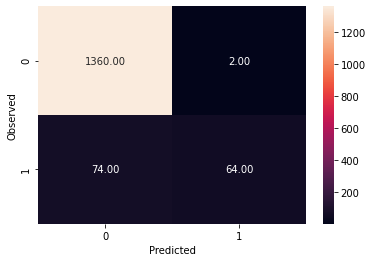

None

Recall: 0.463768115942029

Precision: 0.9696969696969697

F1 Score: 0.6274509803921569

Roc Auc Score: 0.7311498435804125


In [145]:
# Printing all necessary data and stats for training and testing models
print("Training accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

**BUSINESS UNDERSTANDING & REASONING**

**True positive:** Correctly predict positive (1) class(predicting correctly the eligble customer to get loan)
**False positive:** Predict negative (0) class as positive(predicting wrongly the not eligble customer to get loan)
**True negative:** Correctly predict negative (0) class(predicting correctly the not eligble customer not to get loan)
**False negative:** Predict positive class (0) as negative
(predicting wrongly the eligble customer not to get loan)

Here, as per heatmap there is a high correlation between Experience and CCAvg towards Personal loan. Hence we can drop either Experience or CCAvg. Here the column CCAvg has been dropped. Considering Experience,Income,Education,Family,mortgage and etc is an  as independant parameter in predicitng the dependant variable Personal loan.

Though the accuracy is good, model performance is evaluated by the two metrics they are Recall and Precision. Both cannot be high when i do the trade off between these two metrics based experience and CCAvg wherein observed that Precision is high and F1 score is high when we consider Experience as the independant parameter than considereing CCAvg.

Training accuracy 0.952

Testing accuracy 0.9533333333333334

Recall: 0.463768115942029

Precision: 0.9696969696969697

F1 Score: 0.6274509803921569

Roc Auc Score: 0.7311498435804125

The goal was to reduce False Positive( i.e. Reduce the number of falsely given out loans to ineligible customers who were predicted to not pay back the loans). This was done successfully by changing the threshold and tweaking the random seed number during the datafit stage in the prediction model.

** Business understanding :** The goal of any bank is to try and maximise their profits. To do so they must be able to distinguish between eligible and ineligible customers. The model which was built in this assignment was to gain an understanding of prediciton models and how banks can use big datasets to their advantage. They can collect ( within the legal bounds ) valuable information about their customers.
 1. They can try to create more objective fields which can show how valuable a customers can turn out to be.
 2. It seems from the prediction model analysis, education and Income seems to play a vital role in predicting if a person is capable off paying back a role or not.
 3. If income is low and family size is high personal loan should not necessarily br given out since these particular set of customers have many liabilties.
 4. The age,income and mortgage combination also seems to play a big factor in whether a person will take out a loan or not. Since if a person is young and earns a considerably high salary and does not have a mortgage then there is no need to take out a loan.
 5. If a person has a family and a mortgage they are highly likely to take out a loan.

